In [112]:
import pandas as pd

In [113]:
file_path = 'Drum-dataset.xlsx'
data = pd.read_excel(file_path)

In [114]:
data

,pattern 1
0,NaN
1,"Time : 738551 MS , Value: 8 Counter: 1"
2,"Time : 738947 MS , Value: 4 Counter: 2"
3,"Time : 739872 MS , Value: 9 Counter: 3"
4,"Time : 740271 MS , Value: 11 Counter: 4"
...,...
415,"Time : 2469525 MS , Value: 4 Counter: 3"
416,"Time : 2470076 MS , Value: 8 Counter: 4"
417,"Time : 2470278 MS , Value: 7 Counter: 5"
418,"Time : 2470786 MS , Value: 7 Counter: 6"


In [115]:
import pandas as pd
import re

# Load the data

df = pd.read_excel(file_path, header=None, names=['Data'])

# Initialize variables
pattern = None
data_list = []

# Debugging: Print first 5 rows to check the data
print("First 5 rows of the DataFrame:")
print(df.head())

# Regular expression pattern to match the data rows
data_pattern = re.compile(r'Time\s*:\s*(\d+)\s*MS\s*,\s*Value\s*:\s*(\d+)\s*Counter\s*:\s*(\d+)')

# Iterate over the rows in the DataFrame
for index, row in df.iterrows():
    row_data = row['Data']
    if pd.isna(row_data):
        continue
    if 'Pattern' in row_data:
        pattern = row_data
        print(f"Pattern found: {pattern}")  # Debugging: Print when a pattern is found
    else:
        # Extract time, value, and counter using regex
        match = data_pattern.search(row_data)
        if match:
            time, value, counter = match.groups()
            data_list.append([int(time), int(value), int(counter), pattern])
        else:
            print(f"Unmatched row: {row_data}")  # Debugging: Print unmatched rows

# Create a new DataFrame
new_df = pd.DataFrame(data_list, columns=['Time', 'Value', 'Counter', 'Target'])

# Display the new DataFrame
print("New DataFrame:")
print(new_df)

First 5 rows of the DataFrame:
                                      Data
0                                pattern 1
1                                      NaN
2  Time : 738551 MS  , Value: 8 Counter: 1
3  Time : 738947 MS  , Value: 4 Counter: 2
4  Time : 739872 MS  , Value: 9 Counter: 3
Unmatched row: pattern 1
Unmatched row: pattern 2
Unmatched row: pattern 3
Unmatched row: pattern 4
Pattern found: Pattern 5
Unmatched row: pattern 6
New DataFrame:
        Time  Value  Counter     Target
0     738551      8        1       None
1     738947      4        2       None
2     739872      9        3       None
3     740271     11        4       None
4     741174      9        5       None
..       ...    ...      ...        ...
348  2469525      4        3  Pattern 5
349  2470076      8        4  Pattern 5
350  2470278      7        5  Pattern 5
351  2470786      7        6  Pattern 5
352  2470987     17        7  Pattern 5

[353 rows x 4 columns]


In [116]:
for i in new_df.values:
    print(i)

[738551 8 1 None]
[738947 4 2 None]
[739872 9 3 None]
[740271 11 4 None]
[741174 9 5 None]
[815092 7 1 None]
[815447 13 2 None]
[816264 6 3 None]
[816602 13 4 None]
[817355 5 5 None]
[832644 32 1 None]
[833012 5 2 None]
[833875 8 3 None]
[834251 4 4 None]
[835000 4 5 None]
[849463 4 1 None]
[849838 4 2 None]
[850630 10 3 None]
[851011 7 4 None]
[851753 5 5 None]
[869270 22 1 None]
[869644 7 2 None]
[870458 18 3 None]
[870834 8 4 None]
[871577 8 5 None]
[883408 8 1 None]
[883783 4 2 None]
[884612 14 3 None]
[884986 4 4 None]
[885787 11 5 None]
[899358 6 1 None]
[899727 6 2 None]
[900571 4 3 None]
[900962 4 4 None]
[901788 8 5 None]
[920587 5 1 None]
[920948 15 2 None]
[921775 17 3 None]
[922138 5 4 None]
[922915 5 5 None]
[935344 8 1 None]
[935717 13 2 None]
[936582 14 3 None]
[936962 53 4 None]
[937744 9 5 None]
[958752 17 1 None]
[959129 6 2 None]
[959934 11 3 None]
[960314 12 4 None]
[961100 4 5 None]
[1036332 9 1 None]
[1036609 4 2 None]
[1036877 4 3 None]
[1037402 10 4 None]
[10377

In [117]:
df.dtypes

Data    object
dtype: object

In [118]:
# Initialize variables
pattern = None
data_list = []

# Pattern to detect any "Pattern X" line
pattern_detector = re.compile(r'Pattern\s+\d+', re.IGNORECASE)

# Regular expression pattern to match the data rows
data_pattern = re.compile(r'Time\s*:\s*(\d+)\s*MS\s*,\s*Value\s*:\s*(\d+)\s*Counter\s*:\s*(\d+)')

# Iterate over the rows in the DataFrame
for index, row in df.iterrows():
    row_data = row['Data']
    
    if pd.isna(row_data):
        continue
    print (row_data)
    if pattern_detector.search(row_data):
        pattern = row_data
        print(pattern)
    else:
        # Extract time, value, and counter using regex
        match = data_pattern.search(row_data)
        if match:
            time, value, counter = match.groups()
            data_list.append([int(time), int(value), int(counter), pattern])

# Create a new DataFrame
new_df = pd.DataFrame(data_list, columns=['Time', 'Value', 'Counter', 'Target'])

# Display the new DataFrame
print("New DataFrame:")
print(new_df)

pattern 1
pattern 1
Time : 738551 MS  , Value: 8 Counter: 1
Time : 738947 MS  , Value: 4 Counter: 2
Time : 739872 MS  , Value: 9 Counter: 3
Time : 740271 MS  , Value: 11 Counter: 4
Time : 741174 MS  , Value: 9 Counter: 5
Time : 815092 MS  , Value: 7 Counter: 1
Time : 815447 MS  , Value: 13 Counter: 2
Time : 816264 MS  , Value: 6 Counter: 3
Time : 816602 MS  , Value: 13 Counter: 4
Time : 817355 MS  , Value: 5 Counter: 5
Time : 832644 MS  , Value: 32 Counter: 1
Time : 833012 MS  , Value: 5 Counter: 2
Time : 833875 MS  , Value: 8 Counter: 3
Time : 834251 MS  , Value: 4 Counter: 4
Time : 835000 MS  , Value: 4 Counter: 5
Time : 849463 MS  , Value: 4 Counter: 1
Time : 849838 MS  , Value: 4 Counter: 2
Time : 850630 MS  , Value: 10 Counter: 3
Time : 851011 MS  , Value: 7 Counter: 4
Time : 851753 MS  , Value: 5 Counter: 5
Time : 869270 MS  , Value: 22 Counter: 1
Time : 869644 MS  , Value: 7 Counter: 2
Time : 870458 MS  , Value: 18 Counter: 3
Time : 870834 MS  , Value: 8 Counter: 4
Time : 871577

In [119]:
pattern_detector.search("Pattern 1")

<re.Match object; span=(0, 9), match='Pattern 1'>

In [120]:
new_df.dtypes

Time        int64
Value       int64
Counter     int64
Target     object
dtype: object

In [121]:
# Initialize variables
pattern = None
group_id = 0
data_list = []

# Regular expression pattern to match the data rows
data_pattern = re.compile(r'Time\s*:\s*(\d+)\s*MS\s*,\s*Value\s*:\s*(\d+)\s*Counter\s*:\s*(\d+)', re.IGNORECASE)

# Iterate over the rows in the DataFrame to assign group ids
for index, row in df.iterrows():
    row_data = row['Data']
    if pd.isna(row_data):
        group_id += 1  # Increment group id at NaN
        continue
    if re.search(r'pattern\s+\d+', row_data, re.IGNORECASE):
        pattern = row_data
    else:
        match = data_pattern.search(row_data)
        if match:
            time, value, counter = match.groups()
            data_list.append([int(time), int(value), int(counter), pattern, group_id])

# Create a new DataFrame
new_df = pd.DataFrame(data_list, columns=['Time', 'Value', 'Counter', 'Target', 'GroupID'])

# Group by GroupID and aggregate data
grouped_df = new_df.groupby('GroupID').agg({'Time': 'mean', 'Value': 'mean', 'Counter': 'mean', 'Target': 'first'})

# Reset index
grouped_df = grouped_df.reset_index(drop=True)

# Prepare the feature matrix (X) and target vector (y)
X = grouped_df[['Time', 'Value', 'Counter']]
y = grouped_df['Target']

# Example: Display the first few rows of X and y
print("Feature Matrix (X):")
print(X.head())
print("\nTarget Vector (y):")
print(y.head())

Feature Matrix (X):
       Time  Value  Counter
0  739763.0    8.2      3.0
1  816152.0    8.8      3.0
2  833756.4   10.6      3.0
3  850539.0    6.0      3.0
4  870356.6   12.6      3.0

Target Vector (y):
0    pattern 1
1    pattern 1
2    pattern 1
3    pattern 1
4    pattern 1
Name: Target, dtype: object


In [122]:
grouped_df.Target[:11]

0     pattern 1
1     pattern 1
2     pattern 1
3     pattern 1
4     pattern 1
5     pattern 1
6     pattern 1
7     pattern 1
8     pattern 1
9     pattern 1
10    pattern 2
Name: Target, dtype: object

In [123]:
import pandas as pd
import numpy as np
import re

# Load the data (assuming the same format as before)
#file_path = 'Drum-dataset - Copy.xlsx'
df = pd.read_excel(file_path, header=None, names=['Data'])

# Initialize variables
pattern = None
data_list = []
group_id = 0

# Regular expression pattern to match the data rows
data_pattern = re.compile(r'Time\s*:\s*(\d+)\s*MS\s*,\s*Value\s*:\s*(\d+)\s*Counter\s*:\s*(\d+)')

# Iterate over the rows in the DataFrame
for index, row in df.iterrows():
    row_data = row[0]
    if pd.isna(row_data):
        group_id += 1  # Increment group id at NaN to indicate a new group
        continue
    if 'pattern' in str(row_data).lower():
        pattern = row_data
    else:
        # Extract time, value, and counter using regex
        match = data_pattern.search(str(row_data))
        if match:
            time, value, counter = match.groups()
            data_list.append([int(time), int(value), int(counter), pattern, group_id])

# Create a new DataFrame with structured data
structured_df = pd.DataFrame(data_list, columns=['Time', 'Value', 'Counter', 'Pattern', 'GroupID'])

# Display the first few rows of the new DataFrame for verification
structured_df.head()

/tmp/ipykernel_732/2561980164.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_data = row[0]


,Time,Value,Counter,Pattern,GroupID
0,738551,8,1,pattern 1,1
1,738947,4,2,pattern 1,1
2,739872,9,3,pattern 1,1
3,740271,11,4,pattern 1,1
4,741174,9,5,pattern 1,1


In [125]:
structured_df.drop("Value",axis=1 , inplace=True)

In [126]:
structured_df

,Time,Counter,Pattern,GroupID
0,738551,1,pattern 1,1
1,738947,2,pattern 1,1
2,739872,3,pattern 1,1
3,740271,4,pattern 1,1
4,741174,5,pattern 1,1
...,...,...,...,...
348,2469525,3,pattern 6,62
349,2470076,4,pattern 6,62
350,2470278,5,pattern 6,62
351,2470786,6,pattern 6,62


In [127]:
structured_df.to_csv("stage_df.csv")

In [129]:
# Group the data by GroupID and create sequences
grouped = structured_df.groupby('GroupID')
X = []
y = []

for group_id, group_data in grouped:
    # Drop rows where Pattern is None
    group_data = group_data.dropna(subset=['Pattern'])
    
    # If the group is empty after dropping, continue to the next group
    if group_data.empty:
        continue

    # Add the sequence (excluding the Pattern and GroupID columns) to X
    X.append(group_data[['Time', 'Counter']].values)

    # Add the pattern label (assuming all rows in a group have the same label) to y
    y.append(group_data['Pattern'].iloc[0])

# Example: Display the first sequence and its label
print("First Sequence (X[0]):")
print(X[0])
print("\nLabel of First Sequence (y[0]):")
print(y[0])


First Sequence (X[0]):
[[738551      1]
 [738947      2]
 [739872      3]
 [740271      4]
 [741174      5]]

Label of First Sequence (y[0]):
pattern 1


In [130]:
len(X)

61

In [131]:
len(y)

61

In [132]:
# Calculate time differences within each sequence
for i in range(len(X)):
    # Calculate differences in the 'Time' column (first column in each sequence)
    # We use np.diff and prepend a 0 to align the length of the array with the sequence
    time_differences = np.diff(X[i][:, 0], prepend=0)
    
    # Update the 'Time' column in the sequence with these time differences
    X[i][:, 0] = time_differences

# Example: Display the first sequence with time differences and its label
print("First Sequence with Time Differences (X[0]):")
print(X[0])
print("\nLabel of First Sequence (y[0]):")
print(y[0])


First Sequence with Time Differences (X[0]):
[[738551      1]
 [   396      2]
 [   925      3]
 [   399      4]
 [   903      5]]

Label of First Sequence (y[0]):
pattern 1


In [133]:
X

[array([[738551,      1],
        [   396,      2],
        [   925,      3],
        [   399,      4],
        [   903,      5]]),
 array([[815092,      1],
        [   355,      2],
        [   817,      3],
        [   338,      4],
        [   753,      5]]),
 array([[832644,      1],
        [   368,      2],
        [   863,      3],
        [   376,      4],
        [   749,      5]]),
 array([[849463,      1],
        [   375,      2],
        [   792,      3],
        [   381,      4],
        [   742,      5]]),
 array([[869270,      1],
        [   374,      2],
        [   814,      3],
        [   376,      4],
        [   743,      5]]),
 array([[883408,      1],
        [   375,      2],
        [   829,      3],
        [   374,      4],
        [   801,      5]]),
 array([[899358,      1],
        [   369,      2],
        [   844,      3],
        [   391,      4],
        [   826,      5]]),
 array([[920587,      1],
        [   361,      2],
        [   827,      3]

In [134]:
df

,Data
0,pattern 1
1,NaN
2,"Time : 738551 MS , Value: 8 Counter: 1"
3,"Time : 738947 MS , Value: 4 Counter: 2"
4,"Time : 739872 MS , Value: 9 Counter: 3"
...,...
416,"Time : 2469525 MS , Value: 4 Counter: 3"
417,"Time : 2470076 MS , Value: 8 Counter: 4"
418,"Time : 2470278 MS , Value: 7 Counter: 5"
419,"Time : 2470786 MS , Value: 7 Counter: 6"


In [135]:
# Re-running the entire process including reading the dataset and processing it

# Load the dataset
df = pd.read_excel(file_path)

# Initialize variables for processing
pattern = None
data_list = []
group_id = 0

# Regular expression pattern to match the data rows
data_pattern = re.compile(r'Time\s*:\s*(\d+)\s*MS\s*,\s*Value\s*:\s*(\d+)\s*Counter\s*:\s*(\d+)', re.IGNORECASE)

# Iterate over the rows in the DataFrame to assign group ids and capture patterns
for index, row in df.iterrows():
    row_data = row[0]
    if pd.isna(row_data):
        group_id += 1  # Increment group id at NaN
        pattern = None  # Reset pattern at each new group
        continue
    if re.search(r'pattern\s+\d+', str(row_data), re.IGNORECASE):
        pattern = str(row_data).strip().lower()  # Capture and standardize the pattern label
    else:
        match = data_pattern.search(str(row_data))
        if match:
            time, value, counter = match.groups()
            data_list.append([int(time), int(value), int(counter), pattern, group_id])

# Create a new DataFrame with the structured data
structured_df = pd.DataFrame(data_list, columns=['Time', 'Value', 'Counter', 'Pattern', 'GroupID'])

# Group the data by GroupID and create sequences
grouped = structured_df.groupby('GroupID')
X = []
y = []

for group_id, group_data in grouped:
    # Drop rows where Pattern is None
    group_data = group_data.dropna(subset=['Pattern'])
    
    # If the group is empty after dropping, continue to the next group
    if group_data.empty:
        continue

    # Add the sequence (excluding the Pattern and GroupID columns) to X
    X.append(group_data[['Time', 'Value', 'Counter']].values)

    # Add the pattern label to y
    y.append(group_data['Pattern'].iloc[0])

# Adjusting the sequences so that the time always starts at 0
for i in range(len(X)):
    # Ensure the starting time for each sequence is 0
    X[i][:, 0] -= X[i][0, 0]

    # Calculate time differences
    time_differences = np.diff(X[i][:, 0], prepend=0)
    X[i][:, 0] = time_differences

# Example: Display the first sequence with adjusted time and its label
first_sequence_with_adjusted_time = X
label_of_first_sequence = y

first_sequence_with_adjusted_time, label_of_first_sequence

/tmp/ipykernel_732/1891904544.py:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  row_data = row[0]


([array([[  0,   9,   1],
         [277,   4,   2],
         [268,   4,   3],
         [525,  10,   4],
         [389,   4,   5],
         [271,  13,   6]]),
  array([[  0,   8,   1],
         [347,  29,   2],
         [765,  23,   3],
         [358,   4,   4],
         [746,   5,   5],
         [757,   8,   6],
         [347,  30,   7],
         [701,  10,   8],
         [354,   5,   9],
         [723,  22,  10]]),
  array([[  0,   5,   1],
         [413,  12,   2],
         [414,   4,   3]]),
  array([[  0,   5,   1],
         [321,  10,   2],
         [709,  10,   3],
         [321,   8,   4]]),
  array([[  0,   5,   1],
         [555,   6,   2],
         [202,   4,   3],
         [469,   6,   4],
         [208,   4,   5],
         [473,   5,   6],
         [202,   6,   7]])],
 ['pattern 2', 'pattern 3', 'pattern 4', 'pattern 5', 'pattern 6'])

In [136]:
df.dtypes

pattern 1    object
dtype: object

In [137]:
import pandas as pd

In [138]:
# Load the staged DataFrame from the CSV file
staged_df_path = 'stage_df.csv'
staged_df = pd.read_csv(staged_df_path)

# Display the first few rows of the staged DataFrame for inspection
staged_df.head()


,Unnamed: 0,Time,Counter,Pattern,GroupID
0,0,738551,1,pattern 1,1
1,1,738947,2,pattern 1,1
2,2,739872,3,pattern 1,1
3,3,740271,4,pattern 1,1
4,4,741174,5,pattern 1,1


In [139]:
staged_df.drop("Unnamed: 0", axis=1,inplace=True)

In [140]:
staged_df

,Time,Counter,Pattern,GroupID
0,738551,1,pattern 1,1
1,738947,2,pattern 1,1
2,739872,3,pattern 1,1
3,740271,4,pattern 1,1
4,741174,5,pattern 1,1
...,...,...,...,...
348,2469525,3,pattern 6,62
349,2470076,4,pattern 6,62
350,2470278,5,pattern 6,62
351,2470786,6,pattern 6,62


In [141]:
staged_df.dtypes

Time        int64
Counter     int64
Pattern    object
GroupID     int64
dtype: object

In [142]:
max_pattern_length = 10

# Padding missing values for patterns with length less than max_pattern_length
# This is done by reindexing each group to have rows from 0 to max_pattern_length-1 (10 rows for each group)
padded_groups = []
for _, group in staged_df.groupby('GroupID'):
    group = group.set_index('Counter').reindex(range(1, max_pattern_length + 1))
    group['GroupID'] = group['GroupID'].fillna(method='ffill')  # Forward fill the GroupID
    group['Pattern'] = group['Pattern'].fillna(method='ffill')  # Forward fill the Pattern
    padded_groups.append(group)

# Concatenate all padded groups into a single DataFrame
padded_df = pd.concat(padded_groups)

/tmp/ipykernel_732/1763869989.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group['GroupID'] = group['GroupID'].fillna(method='ffill')  # Forward fill the GroupID
/tmp/ipykernel_732/1763869989.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group['Pattern'] = group['Pattern'].fillna(method='ffill')  # Forward fill the Pattern


In [143]:
padded_groups

[             Time    Pattern  GroupID
 Counter                              
 1        738551.0  pattern 1      1.0
 2        738947.0  pattern 1      1.0
 3        739872.0  pattern 1      1.0
 4        740271.0  pattern 1      1.0
 5        741174.0  pattern 1      1.0
 6             NaN  pattern 1      1.0
 7             NaN  pattern 1      1.0
 8             NaN  pattern 1      1.0
 9             NaN  pattern 1      1.0
 10            NaN  pattern 1      1.0,
              Time    Pattern  GroupID
 Counter                              
 1        815092.0  pattern 1      2.0
 2        815447.0  pattern 1      2.0
 3        816264.0  pattern 1      2.0
 4        816602.0  pattern 1      2.0
 5        817355.0  pattern 1      2.0
 6             NaN  pattern 1      2.0
 7             NaN  pattern 1      2.0
 8             NaN  pattern 1      2.0
 9             NaN  pattern 1      2.0
 10            NaN  pattern 1      2.0,
              Time    Pattern  GroupID
 Counter               

In [144]:
cnt = 0
for i in staged_df.groupby('GroupID'):
    print(i)

(1,      Time  Counter    Pattern  GroupID
0  738551        1  pattern 1        1
1  738947        2  pattern 1        1
2  739872        3  pattern 1        1
3  740271        4  pattern 1        1
4  741174        5  pattern 1        1)
(2,      Time  Counter    Pattern  GroupID
5  815092        1  pattern 1        2
6  815447        2  pattern 1        2
7  816264        3  pattern 1        2
8  816602        4  pattern 1        2
9  817355        5  pattern 1        2)
(4,       Time  Counter    Pattern  GroupID
10  832644        1  pattern 1        4
11  833012        2  pattern 1        4
12  833875        3  pattern 1        4
13  834251        4  pattern 1        4
14  835000        5  pattern 1        4)
(5,       Time  Counter    Pattern  GroupID
15  849463        1  pattern 1        5
16  849838        2  pattern 1        5
17  850630        3  pattern 1        5
18  851011        4  pattern 1        5
19  851753        5  pattern 1        5)
(6,       Time  Counter    Patte

In [145]:
flattened_data = []
target = []
for _, group in padded_df.groupby('GroupID'):
    print(len(group))
    # Reset index to include 'Counter' in the columns
    group = group.reset_index()
    
    group.fillna(-1, inplace=True)
    target.append(group['Pattern'][0])
    flattened_row = group.drop(columns=['GroupID', 'Pattern']).stack().to_list()
    
    flattened_data.append(flattened_row)
    

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


In [146]:
target

['pattern 1',
 'pattern 1',
 'pattern 1',
 'pattern 1',
 'pattern 1',
 'pattern 1',
 'pattern 1',
 'pattern 1',
 'pattern 1',
 'pattern 1',
 'pattern 2',
 'pattern 2',
 'pattern 2',
 'pattern 2',
 'pattern 2',
 'pattern 2',
 'pattern 2',
 'pattern 2',
 'pattern 2',
 'pattern 2',
 'pattern 3',
 'pattern 3',
 'pattern 3',
 'pattern 3',
 'pattern 3',
 'pattern 3',
 'pattern 3',
 'pattern 3',
 'pattern 3',
 'pattern 3',
 'pattern 4',
 'pattern 4',
 'pattern 4',
 'pattern 4',
 'pattern 4',
 'pattern 4',
 'pattern 4',
 'pattern 4',
 'pattern 4',
 'pattern 4',
 'pattern 4',
 'Pattern 5',
 'Pattern 5',
 'Pattern 5',
 'Pattern 5',
 'Pattern 5',
 'Pattern 5',
 'Pattern 5',
 'Pattern 5',
 'Pattern 5',
 'Pattern 5',
 'pattern 6',
 'pattern 6',
 'pattern 6',
 'pattern 6',
 'pattern 6',
 'pattern 6',
 'pattern 6',
 'pattern 6',
 'pattern 6',
 'pattern 6']

In [147]:
group.drop(columns=['GroupID', 'Pattern']).stack().tolist()

[1.0,
 2468726.0,
 2.0,
 2469296.0,
 3.0,
 2469525.0,
 4.0,
 2470076.0,
 5.0,
 2470278.0,
 6.0,
 2470786.0,
 7.0,
 2470987.0,
 8.0,
 -1.0,
 9.0,
 -1.0,
 10.0,
 -1.0]

In [148]:
flattened_data[0]

[1.0,
 738551.0,
 2.0,
 738947.0,
 3.0,
 739872.0,
 4.0,
 740271.0,
 5.0,
 741174.0,
 6.0,
 -1.0,
 7.0,
 -1.0,
 8.0,
 -1.0,
 9.0,
 -1.0,
 10.0,
 -1.0]

In [149]:
len(flattened_data)

61

In [150]:
group

,Counter,Time,Pattern,GroupID
0,1,2468726.0,pattern 6,62.0
1,2,2469296.0,pattern 6,62.0
2,3,2469525.0,pattern 6,62.0
3,4,2470076.0,pattern 6,62.0
4,5,2470278.0,pattern 6,62.0
5,6,2470786.0,pattern 6,62.0
6,7,2470987.0,pattern 6,62.0
7,8,-1.0,pattern 6,62.0
8,9,-1.0,pattern 6,62.0
9,10,-1.0,pattern 6,62.0


In [151]:
# Create the final DataFrame with flattened rows
# Each group is a separate observation with a consistent size
feature_columns = [f'{feature}_{i}' for i in range(1, max_pattern_length + 1) for feature in ['Counter', 'Time', ]]

In [152]:
len(feature_columns)

20

In [153]:
print(feature_columns)

['Counter_1', 'Time_1', 'Counter_2', 'Time_2', 'Counter_3', 'Time_3', 'Counter_4', 'Time_4', 'Counter_5', 'Time_5', 'Counter_6', 'Time_6', 'Counter_7', 'Time_7', 'Counter_8', 'Time_8', 'Counter_9', 'Time_9', 'Counter_10', 'Time_10']


In [154]:
def pad_sublists(list_of_lists, pad_value=-1):
    # Find the maximum length of any sublist
    max_length = max(len(sublist) for sublist in list_of_lists)
    print(max_length)
    # Pad each sublist with -1s to make them all the same length
    padded_list = [sublist + [pad_value] * (max_length - len(sublist)) for sublist in list_of_lists]

    return padded_list

In [155]:
flattened_data_pad= pad_sublists(flattened_data)

20


In [156]:
feature_columns

['Counter_1',
 'Time_1',
 'Counter_2',
 'Time_2',
 'Counter_3',
 'Time_3',
 'Counter_4',
 'Time_4',
 'Counter_5',
 'Time_5',
 'Counter_6',
 'Time_6',
 'Counter_7',
 'Time_7',
 'Counter_8',
 'Time_8',
 'Counter_9',
 'Time_9',
 'Counter_10',
 'Time_10']

In [157]:
cnt = 0
for i in feature_columns:
    print(i, flattened_data_pad[0][cnt])
    cnt = cnt + 1

Counter_1 1.0
Time_1 738551.0
Counter_2 2.0
Time_2 738947.0
Counter_3 3.0
Time_3 739872.0
Counter_4 4.0
Time_4 740271.0
Counter_5 5.0
Time_5 741174.0
Counter_6 6.0
Time_6 -1.0
Counter_7 7.0
Time_7 -1.0
Counter_8 8.0
Time_8 -1.0
Counter_9 9.0
Time_9 -1.0
Counter_10 10.0
Time_10 -1.0


In [158]:
flattened_df = pd.DataFrame(flattened_data_pad, columns=feature_columns)

In [159]:
flattened_df.dtypes

Counter_1     float64
Time_1        float64
Counter_2     float64
Time_2        float64
Counter_3     float64
Time_3        float64
Counter_4     float64
Time_4        float64
Counter_5     float64
Time_5        float64
Counter_6     float64
Time_6        float64
Counter_7     float64
Time_7        float64
Counter_8     float64
Time_8        float64
Counter_9     float64
Time_9        float64
Counter_10    float64
Time_10       float64
dtype: object

In [160]:
df = flattened_df.copy()

In [161]:
import pandas as pd

# Example DataFrame initialization (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv') or use your existing DataFrame

# Convert Time Columns to DateTime Format
#for i in range(1, 11):  # Adjust based on your number of Time columns
 #   df[f'Time_{i}'] = pd.to_datetime(df[f'Time_{i}'])

# Calculate Time Deltas
for i in range(1, 10):  # One less than the number of Time columns
    # Check if Time_{i+1} is -1 indicating a missing value
    df[f'Delta_{i}'] = df.apply(lambda row: 7 if row[f'Time_{i+1}'] == -1 else row[f'Time_{i+1}'] - row[f'Time_{i}'], axis=1)

# Remove Original Time Columns
for i in range(1, 11):  # Again, based on your number of Time columns
    df.drop(f'Time_{i}', axis=1, inplace=True)

# Now, df has the Delta columns and no longer has the original Time columns


In [163]:
df

,Counter_1,Counter_2,Counter_3,Counter_4,Counter_5,Counter_6,Counter_7,Counter_8,Counter_9,Counter_10,Delta_1,Delta_2,Delta_3,Delta_4,Delta_5,Delta_6,Delta_7,Delta_8,Delta_9
0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,396.0,925.0,399.0,903.0,7.0,7.0,7.0,7.0,7.0
1,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,355.0,817.0,338.0,753.0,7.0,7.0,7.0,7.0,7.0
2,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,368.0,863.0,376.0,749.0,7.0,7.0,7.0,7.0,7.0
3,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,375.0,792.0,381.0,742.0,7.0,7.0,7.0,7.0,7.0
4,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,374.0,814.0,376.0,743.0,7.0,7.0,7.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,592.0,206.0,539.0,203.0,505.0,202.0,7.0,7.0,7.0
57,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,577.0,203.0,538.0,202.0,509.0,203.0,7.0,7.0,7.0
58,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,696.0,221.0,664.0,217.0,691.0,222.0,7.0,7.0,7.0
59,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,647.0,232.0,666.0,210.0,625.0,215.0,7.0,7.0,7.0


In [164]:
X_test = df.copy()

In [165]:
df.columns

Index(['Counter_1', 'Counter_2', 'Counter_3', 'Counter_4', 'Counter_5',
       'Counter_6', 'Counter_7', 'Counter_8', 'Counter_9', 'Counter_10',
       'Delta_1', 'Delta_2', 'Delta_3', 'Delta_4', 'Delta_5', 'Delta_6',
       'Delta_7', 'Delta_8', 'Delta_9'],
      dtype='object')

In [166]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [167]:
from sklearn.model_selection import train_test_split

In [168]:
x_train,x_test,y_train,y_test = train_test_split(df,target, test_size=0.3, stratify=target, shuffle=True, random_state=25)

In [169]:
x_train

,Counter_1,Counter_2,Counter_3,Counter_4,Counter_5,Counter_6,Counter_7,Counter_8,Counter_9,Counter_10,Delta_1,Delta_2,Delta_3,Delta_4,Delta_5,Delta_6,Delta_7,Delta_8,Delta_9
59,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,647.0,232.0,666.0,210.0,625.0,215.0,7.0,7.0,7.0
33,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,393.0,412.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
42,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,321.0,721.0,350.0,7.0,7.0,7.0,7.0,7.0,7.0
43,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,326.0,717.0,357.0,7.0,7.0,7.0,7.0,7.0,7.0
37,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,354.0,358.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
54,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,612.0,203.0,612.0,203.0,548.0,202.0,7.0,7.0,7.0
41,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,321.0,709.0,321.0,7.0,7.0,7.0,7.0,7.0,7.0
35,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,398.0,386.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
27,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,367.0,790.0,360.0,775.0,786.0,357.0,755.0,360.0,735.0
50,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,361.0,767.0,386.0,7.0,7.0,7.0,7.0,7.0,7.0


In [170]:
from sklearn.tree import DecisionTreeClassifier

In [181]:
clf= DecisionTreeClassifier(max_depth=3)

In [182]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [183]:
y_pred = clf.predict(x_test)

In [184]:
from sklearn.metrics import classification_report

In [185]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

   Pattern 5       1.00      1.00      1.00         3
   pattern 1       1.00      1.00      1.00         3
   pattern 2       1.00      1.00      1.00         3
   pattern 3       1.00      1.00      1.00         3
   pattern 4       1.00      1.00      1.00         4
   pattern 6       1.00      1.00      1.00         3

    accuracy                           1.00        19
   macro avg       1.00      1.00      1.00        19
weighted avg       1.00      1.00      1.00        19



In [186]:
pip install matplotlib graphviz



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [187]:
!apt-get install graphviz -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [188]:
clf.classes_

array(['Pattern 5', 'pattern 1', 'pattern 2', 'pattern 3', 'pattern 4',
       'pattern 6'], dtype='<U9')

In [189]:
x_train.columns

Index(['Counter_1', 'Counter_2', 'Counter_3', 'Counter_4', 'Counter_5',
       'Counter_6', 'Counter_7', 'Counter_8', 'Counter_9', 'Counter_10',
       'Delta_1', 'Delta_2', 'Delta_3', 'Delta_4', 'Delta_5', 'Delta_6',
       'Delta_7', 'Delta_8', 'Delta_9'],
      dtype='object')

In [190]:
feature_columns

['Counter_1',
 'Time_1',
 'Counter_2',
 'Time_2',
 'Counter_3',
 'Time_3',
 'Counter_4',
 'Time_4',
 'Counter_5',
 'Time_5',
 'Counter_6',
 'Time_6',
 'Counter_7',
 'Time_7',
 'Counter_8',
 'Time_8',
 'Counter_9',
 'Time_9',
 'Counter_10',
 'Time_10']

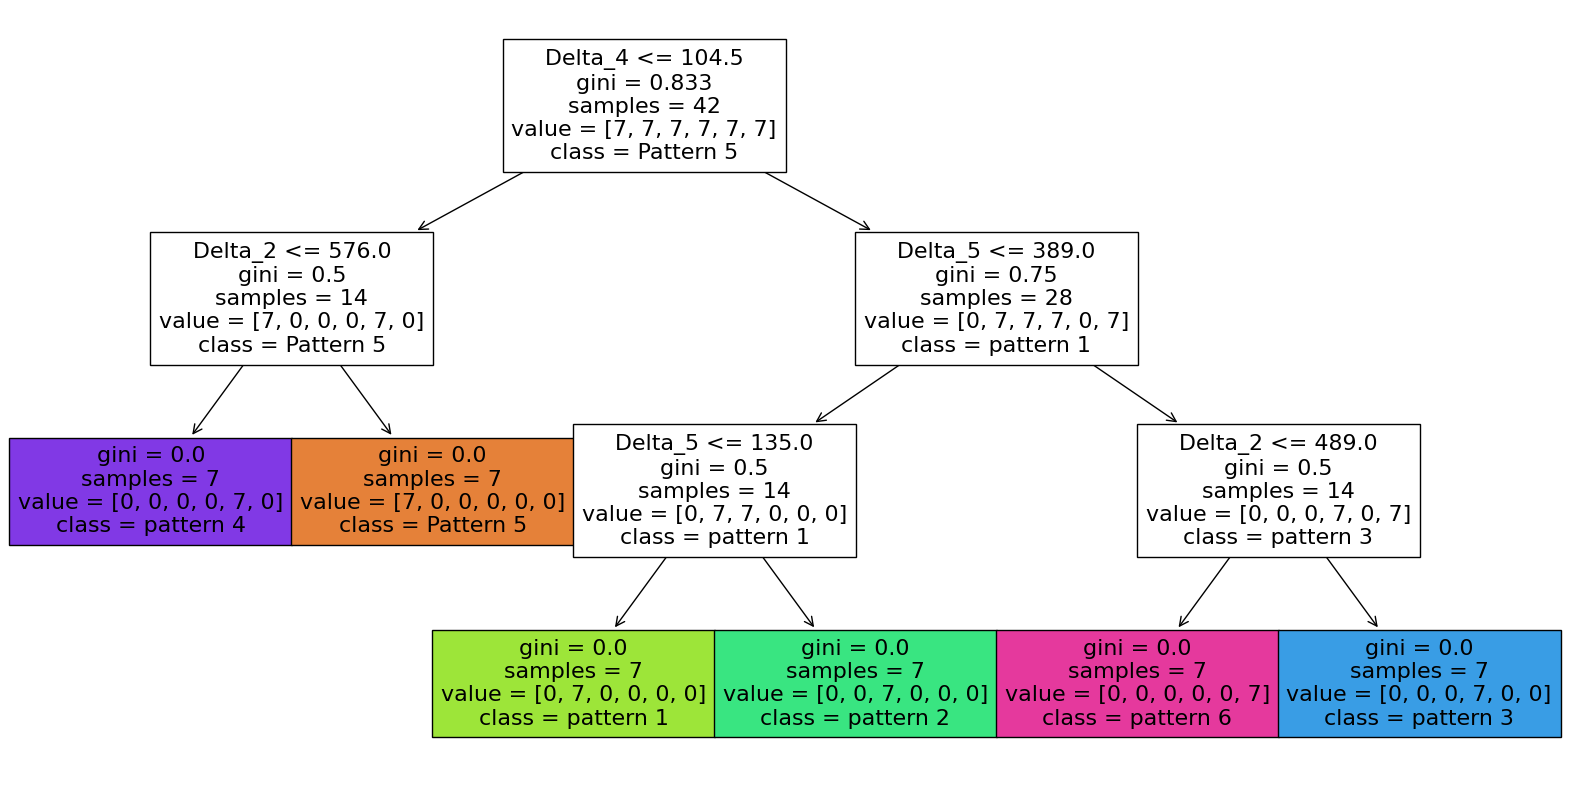

In [191]:
from sklearn import tree
import matplotlib.pyplot as plt
import graphviz 

# Assuming clf is your decision tree model
# clf = DecisionTreeClassifier().fit(X_train, y_train) 
# or clf = DecisionTreeRegressor().fit(X_train, y_train)

class_names_str = [str(cls) for cls in clf.classes_]

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=x_train.columns,  # Assuming x_train is your feature DataFrame
                                class_names=class_names_str,    # Use the converted class names
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")

# Alternatively, plot using matplotlib (simpler, but less customizable)
plt.figure(figsize=(20,10))  # Adjust the size as needed
tree.plot_tree(clf, 
               feature_names=x_train.columns,  # Replace with your feature names
               class_names=class_names_str,      # Replace with your class names for classification
               filled=True)
plt.show()


In [192]:
x_train

,Counter_1,Counter_2,Counter_3,Counter_4,Counter_5,Counter_6,Counter_7,Counter_8,Counter_9,Counter_10,Delta_1,Delta_2,Delta_3,Delta_4,Delta_5,Delta_6,Delta_7,Delta_8,Delta_9
59,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,647.0,232.0,666.0,210.0,625.0,215.0,7.0,7.0,7.0
33,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,393.0,412.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
42,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,321.0,721.0,350.0,7.0,7.0,7.0,7.0,7.0,7.0
43,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,326.0,717.0,357.0,7.0,7.0,7.0,7.0,7.0,7.0
37,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,354.0,358.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
54,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,612.0,203.0,612.0,203.0,548.0,202.0,7.0,7.0,7.0
41,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,321.0,709.0,321.0,7.0,7.0,7.0,7.0,7.0,7.0
35,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,398.0,386.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
27,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,367.0,790.0,360.0,775.0,786.0,357.0,755.0,360.0,735.0
50,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,361.0,767.0,386.0,7.0,7.0,7.0,7.0,7.0,7.0


In [193]:
from sklearn.tree import DecisionTreeClassifier, export_text

# Extract rules from the tree  
tree_rules = export_text(clf, feature_names=x_train.columns, decimals=10)

# Format rules as if-statements
if_statements = []
for rule in tree_rules.splitlines():
    conditions = rule.split(" ")[0]
    if "y=" in rule:
        prediction = rule.split("=")[1]
        if_stmt = "if " + conditions + ":  y = " + prediction
        if_statements.append(if_stmt)

print("\n".join(if_statements))

In [194]:
print(tree_rules)

|--- Delta_4 <= 104.5000000000
|   |--- Delta_2 <= 576.0000000000
|   |   |--- class: pattern 4
|   |--- Delta_2 >  576.0000000000
|   |   |--- class: Pattern 5
|--- Delta_4 >  104.5000000000
|   |--- Delta_5 <= 389.0000000000
|   |   |--- Delta_5 <= 135.0000000000
|   |   |   |--- class: pattern 1
|   |   |--- Delta_5 >  135.0000000000
|   |   |   |--- class: pattern 2
|   |--- Delta_5 >  389.0000000000
|   |   |--- Delta_2 <= 489.0000000000
|   |   |   |--- class: pattern 6
|   |   |--- Delta_2 >  489.0000000000
|   |   |   |--- class: pattern 3



In [72]:
clf.feature_importances_

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. ])

In [73]:
importances = clf.feature_importances_ 


importances_df = pd.DataFrame({"feature": x_train.columns, "importance": importances})


importances_df.sort_values('importance',ascending=False)

,feature,importance
7,Value_4,0.5
20,Delta_1,0.5
0,Counter_1,0.0
15,Value_8,0.0
27,Delta_8,0.0
26,Delta_7,0.0
25,Delta_6,0.0
24,Delta_5,0.0
23,Delta_4,0.0
22,Delta_3,0.0


In [74]:
import pickle
from sklearn.tree import DecisionTreeClassifier



# save your model to a file
filename = 'dt_model.pkl'
pickle.dump(clf, open(filename, 'wb'))




In [75]:
# load your model from the file
loaded_dt = pickle.load(open(filename, 'rb'))

# make predictions with the loaded model
y_pred = loaded_dt.predict(X_test)

In [76]:
y_pred

array(['Pattern 5', 'Pattern 5', 'Pattern 5', 'Pattern 5', 'Pattern 5',
       'Pattern 5', 'Pattern 5', 'Pattern 5', 'Pattern 5', 'Pattern 5',
       'pattern 2', 'pattern 2', 'pattern 2', 'pattern 2', 'pattern 2',
       'pattern 2', 'pattern 2', 'pattern 2', 'pattern 2', 'pattern 2',
       'Pattern 5', 'Pattern 5', 'Pattern 5', 'Pattern 5', 'Pattern 5',
       'Pattern 5', 'Pattern 5', 'Pattern 5', 'Pattern 5', 'Pattern 5',
       'pattern 4', 'pattern 4', 'pattern 4', 'pattern 4', 'pattern 4',
       'pattern 4', 'pattern 4', 'pattern 4', 'pattern 4', 'pattern 4',
       'pattern 4', 'Pattern 5', 'Pattern 5', 'Pattern 5', 'Pattern 5',
       'Pattern 5', 'Pattern 5', 'Pattern 5', 'Pattern 5', 'Pattern 5',
       'Pattern 5', 'Pattern 5', 'Pattern 5', 'Pattern 5', 'Pattern 5',
       'Pattern 5', 'Pattern 5', 'Pattern 5', 'Pattern 5', 'Pattern 5',
       'Pattern 5'], dtype='<U9')

In [77]:
cnt = 0
for i in X_test:
    print(f'index{cnt}:', X_test[i][0])
    cnt = cnt + 1

index0: 1.0
index1: 8.0
index2: 2.0
index3: 4.0
index4: 3.0
index5: 9.0
index6: 4.0
index7: 11.0
index8: 5.0
index9: 9.0
index10: 6.0
index11: -1.0
index12: 7.0
index13: -1.0
index14: 8.0
index15: -1.0
index16: 9.0
index17: -1.0
index18: 10.0
index19: -1.0
index20: 396.0
index21: 925.0
index22: 399.0
index23: 903.0
index24: 7.0
index25: 7.0
index26: 7.0
index27: 7.0
index28: 7.0
